In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

#### 1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [2]:
def hypo(X, w):
  return np.dot(X, w)
  # X - матриця даних
  # w - вектор коефіцієнтів

#### 2. Cтворіть функцію для обчислення функції втрат у векторному вигляді;

In [3]:
def loss(w, X, y):
    N = len(y) # Визначаємо кількість варіантів
    predictions = hypo(X, w) # Шукаємо скалярний добуток матриці та вектору
    loss = (1/2*N) * np.sum((predictions - y)**2) # Шукаємо втрати у векторному вигляді
    return loss

#### 3. Реалізуйте один крок градієнтного спуску

In [4]:
def grad_step(X, y, w, learning_rate):
  N = len(y) # Визначаємо кількість варіантів
  predictions = hypo(X, w) # Шукаємо скалярний добуток матриці та вектору
  error = predictions - y
  grad = (1/N) * np.dot(X.T, error)
  w = w - learning_rate * grad
  return w

#### 4. Знайдіть найкращі параметри для датасету, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [5]:
data_url = 'https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view'
download_url = 'https://drive.google.com/uc?id=' + data_url.split("/")[-2]
data = pd.read_csv(download_url)
display(data.head())
data.replace('NaN', np.nan, inplace=True)
display(data.isnull().sum())
display(data.dtypes)

# Читаємо файл, перевіряємо його на пусті значення та типи колонок

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
features = ['area', 'bedrooms', 'bathrooms']
X = data[features]
y = data['price']
model = LinearRegression()
model.fit(X, y)
print(f'Scikit-learn coeficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

Scikit-learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.6076326361


#### Знайдіть ці ж параметри за допомогою аналітичного рішення

In [7]:
#створюємо масив, заповнений одиницями для додавання його до масиву X та зміщення інших значеннь вниз
X_ones = np.ones((X.shape[0], 1))
# об'єднуємо кортж масивів горизонтально
X = np.hstack((X_ones, X))
#шукаємо коефіцієнт та інтерсепт
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)


In [8]:
print(f'Analitic learn coeficients: {w[1:]}')
print(f'Analitic learn intercept: {w[0]}')


Analitic learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Analitic learn intercept: -173171.6076326356


#### Порівняйте отримані результати

---
Порівнюючи використання  scikit-learn та аналітичний метод, приходимо до висновку, що обидва методи дають ідентичний результат, тому для знаходження найкращих показників параметрів вектору (w) можна використовувати будь-який з них

---



#### Відобразимо на графіку залежності ціни від інших показників

In [10]:
import matplotlib.pyplot as plt

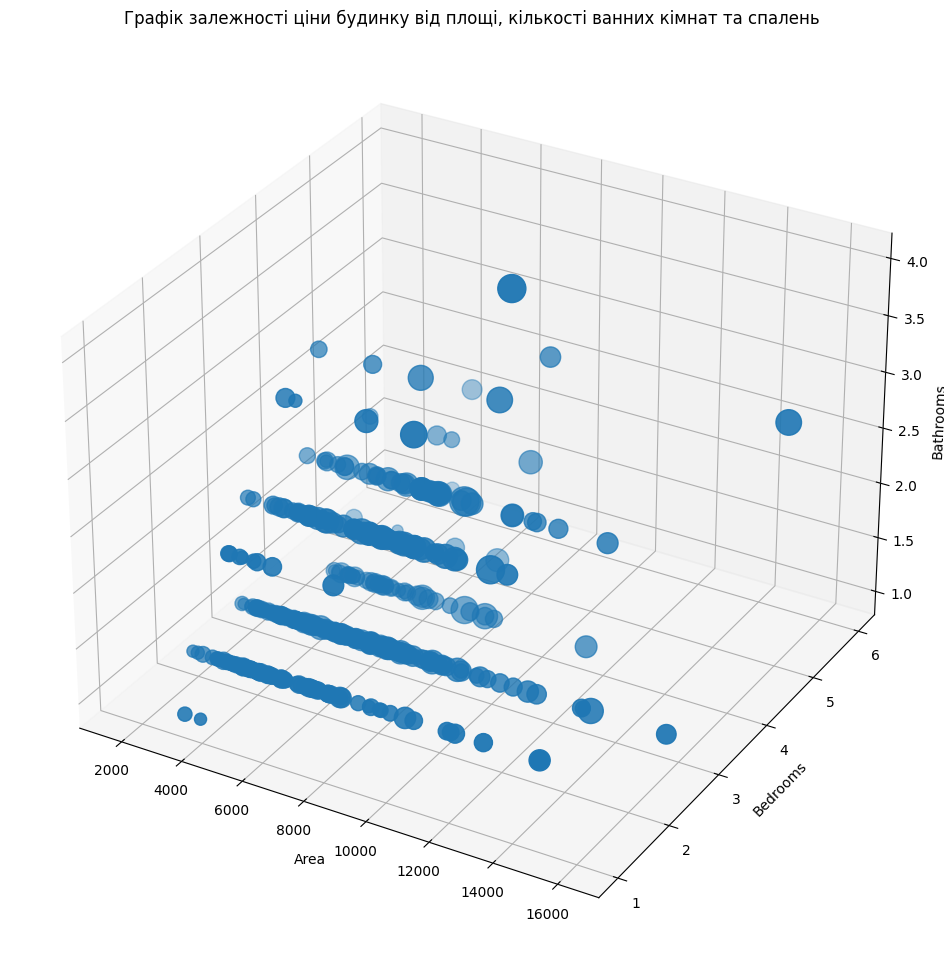

In [31]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")

ax.scatter(data['area'], data['bedrooms'], data['bathrooms'], s=data['price']/30000)
plt.title('Графік залежності ціни будинку від площі, кількості ванних кімнат та спалень')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Bathrooms')
plt.show()

In [ ]:
import plotly.graph_objects as go

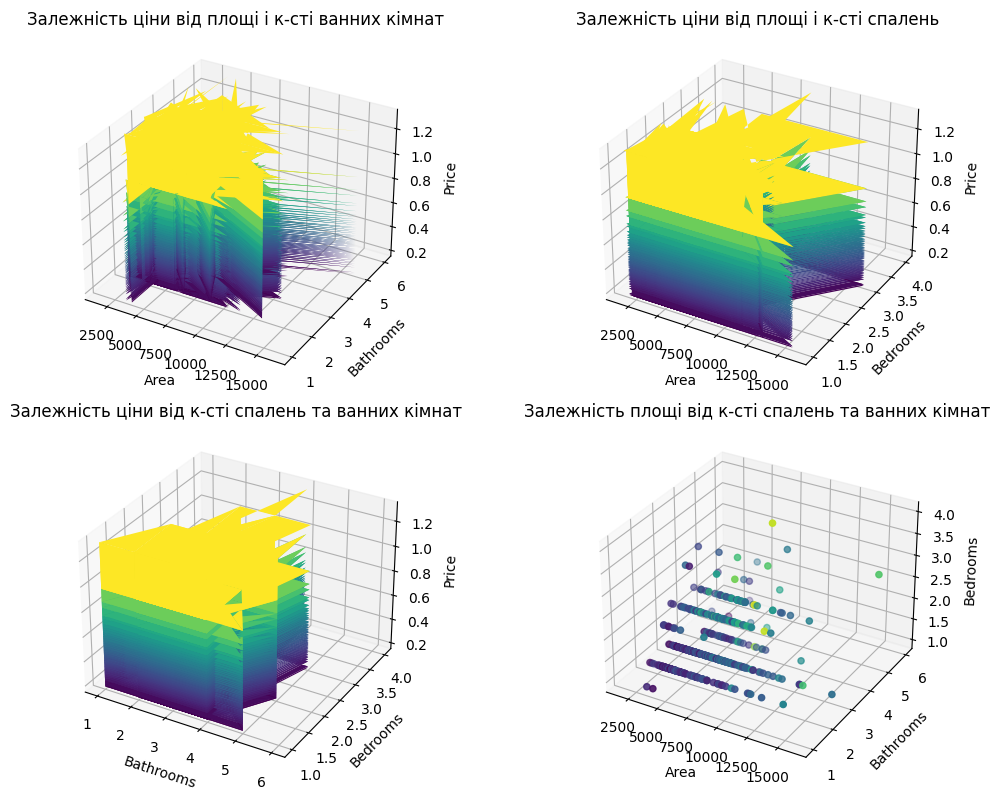

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X[:, 1], X[:, 2], y.values.reshape(-1, 1), cmap='viridis')
ax1.set_title('Залежність ціни від площі і к-сті ванних кімнат')
ax1.set_xlabel('Area')
ax1.set_ylabel('Bathrooms')
ax1.set_zlabel('Price')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X[:, 1], X[:, 3], y.values.reshape(-1, 1), cmap='viridis')
ax2.set_title('Залежність ціни від площі і к-сті спалень')
ax2.set_xlabel('Area')
ax2.set_ylabel('Bedrooms')
ax2.set_zlabel('Price')

ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X[:, 2], X[:, 3], y.values.reshape(-1, 1), cmap='viridis')
ax3.set_title('Залежність ціни від к-сті спалень та ванних кімнат')
ax3.set_xlabel('Bathrooms')
ax3.set_ylabel('Bedrooms')
ax3.set_zlabel('Price')

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X[:, 1], X[:, 2], X[:, 3], c=y, cmap='viridis')
ax4.set_title('Залежність площі від к-сті спалень та ванних кімнат')
ax4.set_xlabel('Area')
ax4.set_ylabel('Bathrooms')
ax4.set_zlabel('Bedrooms')

plt.tight_layout()
plt.show()
